In [1]:
//%jsroot on

In [2]:
int start = 0;
int stop = start;
TChain *fch;
fch = new TChain("RawData", "tele");
for (int i= start; i<=stop; i++){
  TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/jws202/expdata/tele%04d.root" , i);
  //TString fileName = TString::Format("/data/d1/zhuhy/telefile/tele%04d.root" , i);
  fch->AddFile(fileName.Data());}

TCanvas *c1=new TCanvas;
// 创建6×6网格画布
TCanvas *c_all = new TCanvas("c_all", "All Channel Thresholds", 900, 600);
c_all->Divide(6, 6); // 6列×6行

In [3]:
 //TModV830AC      *Mod104_TModV830AC;
   UInt_t          fGeo1;
   UInt_t          fCrateNum1;
   UInt_t          MaxChannel1;
   UInt_t          chdata1[32];
 //TModV785        *Mod107_TModV785;
   UInt_t          fGeo2;
   UInt_t          fCrateNum2;
   UInt_t          MaxChannel2;
   UShort_t        chdata2[32];
 //TModV785        *Mod111_TModV785;
   UInt_t          fGeo3;
   UInt_t          fCrateNum3;
   UInt_t          MaxChannel3;
   UShort_t        chdata3[32];

   // List of branches
   TBranch        *b_Mod104_TModV830AC_TBoard_fGeo;   //!
   TBranch        *b_Mod104_TModV830AC_TBoard_fCrateNum;   //!
   TBranch        *b_Mod104_TModV830AC_TBoard_MaxChannel;   //!
   TBranch        *b_Mod104_TModV830AC_chdata;   //!
   TBranch        *b_Mod107_TModV785_TBoard_fGeo;   //!
   TBranch        *b_Mod107_TModV785_TBoard_fCrateNum;   //!
   TBranch        *b_Mod107_TModV785_TBoard_MaxChannel;   //!
   TBranch        *b_Mod107_TModV785_chdata;   //!
   TBranch        *b_Mod111_TModV785_TBoard_fGeo;   //!
   TBranch        *b_Mod111_TModV785_TBoard_fCrateNum;   //!
   TBranch        *b_Mod111_TModV785_TBoard_MaxChannel;   //!
   TBranch        *b_Mod111_TModV785_chdata;   //!


//fch->GetListOfBranches()->Print();
//   fch->SetMakeClass(1);
/*
   TBranch        *b_fGeo2;   //!
   TBranch        *b_chdata2;   //!

    fch->SetBranchAddress("Mod107_TModV785.fGeo", &fGeo2,&b_fGeo2);
    fch->SetBranchAddress("Mod107_TModV785.chdata[32]", chdata2,&b_chdata2);
*/
   fch->SetMakeClass(1);

   fch->SetBranchAddress("Mod104_TModV830AC.TBoard.fGeo", &fGeo1, &b_Mod104_TModV830AC_TBoard_fGeo);
   fch->SetBranchAddress("Mod104_TModV830AC.TBoard.fCrateNum", &fCrateNum1, &b_Mod104_TModV830AC_TBoard_fCrateNum);
   fch->SetBranchAddress("Mod104_TModV830AC.TBoard.MaxChannel", &MaxChannel1, &b_Mod104_TModV830AC_TBoard_MaxChannel);
   fch->SetBranchAddress("Mod104_TModV830AC.chdata[32]", chdata1, &b_Mod104_TModV830AC_chdata);
   fch->SetBranchAddress("Mod107_TModV785.TBoard.fGeo", &fGeo2, &b_Mod107_TModV785_TBoard_fGeo);
   fch->SetBranchAddress("Mod107_TModV785.TBoard.fCrateNum", &fCrateNum2, &b_Mod107_TModV785_TBoard_fCrateNum);
   fch->SetBranchAddress("Mod107_TModV785.TBoard.MaxChannel", &MaxChannel2, &b_Mod107_TModV785_TBoard_MaxChannel);
   fch->SetBranchAddress("Mod107_TModV785.chdata[32]", chdata2, &b_Mod107_TModV785_chdata);
   fch->SetBranchAddress("Mod111_TModV785.TBoard.fGeo", &fGeo3, &b_Mod111_TModV785_TBoard_fGeo);
   fch->SetBranchAddress("Mod111_TModV785.TBoard.fCrateNum", &fCrateNum3, &b_Mod111_TModV785_TBoard_fCrateNum);
   fch->SetBranchAddress("Mod111_TModV785.TBoard.MaxChannel", &MaxChannel3, &b_Mod111_TModV785_TBoard_MaxChannel);
   fch->SetBranchAddress("Mod111_TModV785.chdata[32]", chdata3, &b_Mod111_TModV785_chdata);


In [4]:
TH1F *h[32],*hc[32];
TH2F *pid[32];
for (int i = 0; i < 32; i++) {
    TString histName = TString::Format("h%d", i);
    TString histTitle = TString::Format("Channel %d Threshold Distribution", i);
    h[i] = new TH1F(histName, histTitle, 200, 0, 4000); // 10000 bins from 0-10000
    TString histName2 = TString::Format("hc%d", i);
    TString histTitle2 = TString::Format("MeV %d", i);
    hc[i] = new TH1F(histName2, histTitle2, 200, 0, 10); // 10000 bins from 0-10000
    TString histName3 = TString::Format("pid%d", i);
    TString histTitle3 = TString::Format("PID %d", i);
    pid[i] = new TH2F(histName3, histTitle3, 200, 0, 400,200,0,1); // 10000 bins from 0-10000
}

In [5]:
Double_t k_l[16][2] = {
		1.50159,-56.5635,//0
		1.54455,-75.1189,//1
		1.54236,-81.0749,//2
		1.51789,-111.65,//3
		1.51342,-111.598,//4
		1.52696,-71.2166,//5
		1.52952,-82.6223,//6
		1.55484,-57.8609,//7

		1.52956,-135.54,//8
		1.54115,-73.8693,//9
		1.49743,-126.802,//10
		1.52058,-78.0742,//11
		1.54874,-110.198,//12
		1.57052,-86.3039,//13
		1.53963,-92.6229,//14
		1.51213,-158.192,//15
	};
Double_t themean[32]={75.9433, 87.3589, 91.8804, 111.089, 116.28, 85.548, 91.8025, 73.6489, 129.141, 85.7894,
                      112.617, 85.2834, 123.678, 98.4546, 104.44, 115.135, 137.928, 523.375, 116.633, 119.831,
                      125.139, 108.483, 118.037, 122.678, 117.823, 117.74, 122.828, 135.941, 120.017, 108.23,
                      111.575, 144.64};
Double_t thesigma[32]={5.04732, 1.83262, 1.20977, 0.681057, 5.36665, 5.59798, 1.13982, 3.2146, 0.983292, 6.32361,
                       1.65994, 5.22547, 6.0171, 5.49935, 9.58709, 4.88437, 24.423, 156.416, 5.9648, 6.59314,
                       7.12833, 7.08714, 5.41373, 7.06391, 5.56377, 5.54476, 7.05305, 6.10548, 6.71595, 7.0804,
                       6.92672, 7.12657};
Double_t pedel[32];
for(Int_t ii=0;ii<32;ii++){
    pedel[ii]=themean[ii]+2*thesigma[ii];
}

In [6]:
   Long64_t nentries = fch->GetEntries();
   for (Long64_t jentry=0; jentry<nentries;jentry+=100) {
      fch->GetEntry(jentry);
      if(jentry%1000000==0)cout<<jentry<<'\n';
      for (int ch = 0; ch < 32; ch++) {
        h[ch]->Fill(chdata3[ch]);
        if(ch<16&&chdata3[ch]>pedel[ch]){
            hc[ch]->Fill((chdata3[ch]*k_l[ch][0]+k_l[ch][1])/1000.);
            pid[ch]->Fill(chdata3[15],(chdata3[ch]*k_l[ch][0]+k_l[ch][1])/1000.);
        }
      }
   }

0


Warning in <TClass::Init>: no dictionary for class TModV830AC is available
Warning in <TClass::Init>: no dictionary for class TBoard is available
Warning in <TClass::Init>: no dictionary for class TModV785 is available


1000000


In [7]:
Double_t mean[32] = {0};
Double_t sigma[32] = {0};
// 创建图形对象
TGraph *gmean = new TGraph();
TGraph *gsigma = new TGraph();

In [8]:
TF1 *gausFit = new TF1("gausFit", "gaus", 0, 200); // 在0-200道范围内拟合
gausFit->SetLineColor(kRed); // 设置拟合线为红色



for (int ch = 0; ch < 32; ch++) {
    // 检查直方图是否有数据
    if (h[ch]->Integral() < 100) {
        cout << "Warning: Channel " << ch << " has insufficient data for fitting (" 
             << h[ch]->Integral() << " entries)" << endl;
        mean[ch] = 0;
        sigma[ch] = 0;
        continue;
    }
    // 找到最高bin的位置
    int maxBin = h[ch]->GetMaximumBin();
    double maxBinCenter = h[ch]->GetBinCenter(maxBin);
    
    // 计算拟合范围上限：最高bin位置 + 80道
    double fitEnd = maxBinCenter + 80;
    
    // 执行高斯拟合（在0-200道范围内）
    h[ch]->Fit("gausFit", "QR", "", 0, fitEnd); // Q: quiet, R: range
    
    // 获取拟合结果
    mean[ch] = gausFit->GetParameter(1);
    sigma[ch] = gausFit->GetParameter(2);
    
    // 将结果添加到图形
    gmean->SetPoint(ch, ch, mean[ch]);
    gsigma->SetPoint(ch, ch, sigma[ch]);
    
}


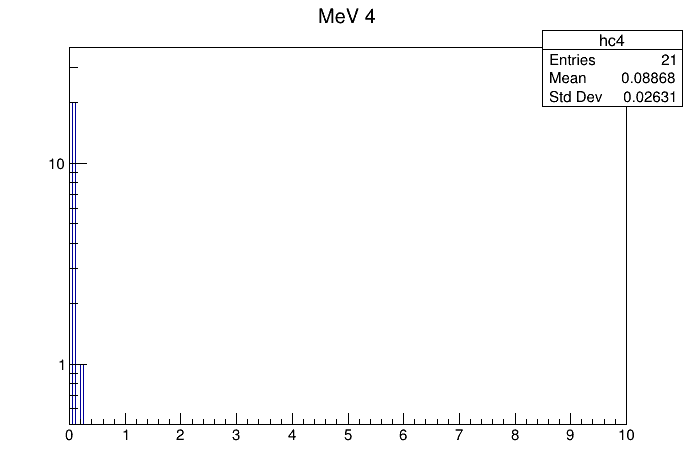

In [9]:
c1->Clear();
hc[4]->Draw();
c1->SetLogy(1);
c1->Draw();

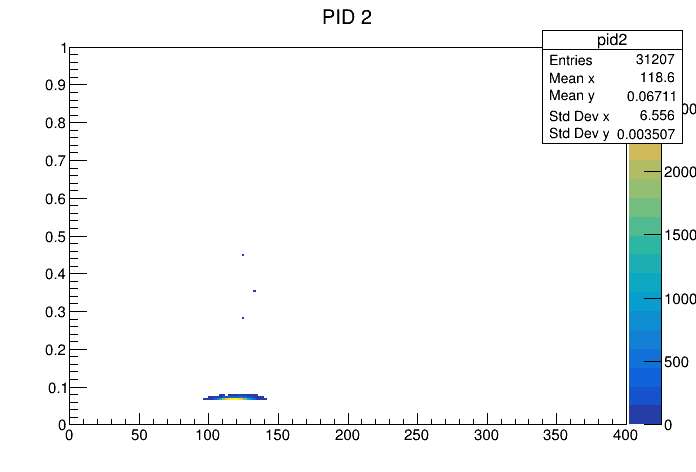

In [10]:
c1->Clear();
pid[2]->Draw("colz");
c1->SetLogy(0);
c1->Draw();

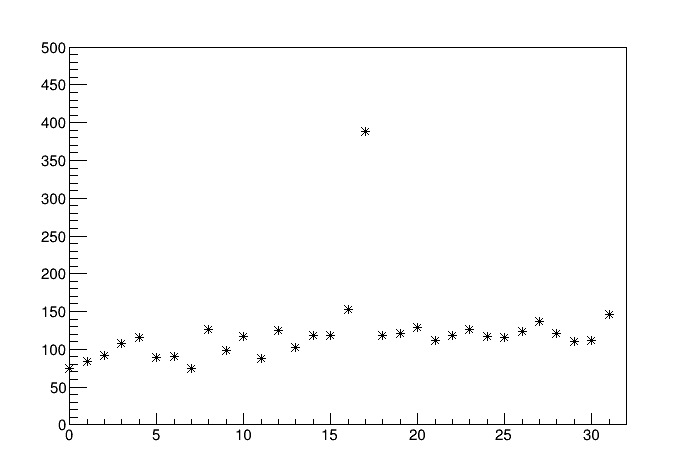

In [11]:
c1->Clear();
gmean->GetXaxis()->SetLimits(0, 32);
gmean->GetYaxis()->SetRangeUser(0 , 500.); 
gmean->SetMarkerStyle(3);
gmean->Draw("ap");
c1->SetLogy(0);
c1->Draw();

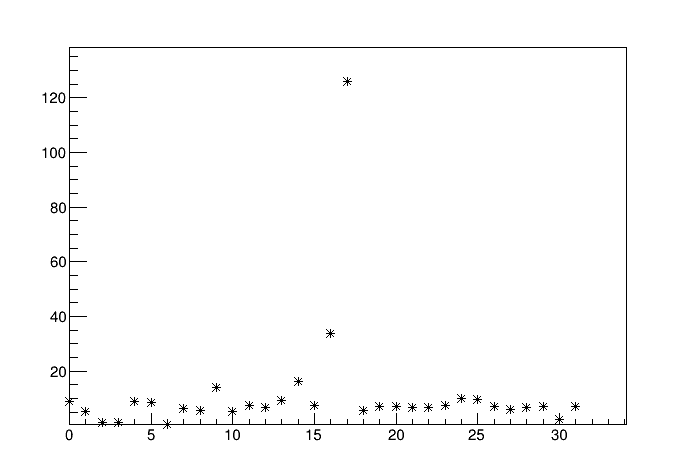

In [12]:
c1->Clear();
gsigma->SetMarkerStyle(3);
gsigma->Draw("ap");
c1->SetLogy(0);
c1->Draw();

In [13]:
for(Int_t ii=0;ii<32;ii++){
    cout<<mean[ii]<<", ";
}
cout<<'\n'<<'\n';
for(Int_t ii=0;ii<32;ii++){
    cout<<sigma[ii]<<", ";
}

75.0029, 84.2532, 92.0921, 108.179, 114.969, 88.5111, 90.908, 74.5958, 125.936, 98.7603, 116.997, 87.7356, 125.137, 103.006, 117.846, 118.268, 152.272, 388.325, 118.505, 121.425, 129.385, 112.014, 118.664, 125.666, 116.47, 116.068, 124.12, 137.288, 120.803, 110.322, 112.084, 146.017, 

8.89283, 5.35916, 1.28999, 1.11818, 8.8608, 8.65251, 0.410672, 6.40665, 5.76767, 14.0098, 5.41618, 7.30348, 6.72502, 9.4423, 16.0641, 7.30446, 33.6933, 125.983, 5.7045, 6.94023, 7.12944, 6.85865, 6.67644, 7.27388, 9.91186, 9.67813, 7.16488, 5.96416, 6.6759, 7.01884, 2.35296, 7.20823, 